In [1]:
import pandas as pd

# Load stock data
df = pd.read_csv(r'C:\Users\Dell\VS_code\Project2\output\all_stocks.csv')

print(df.head())


       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume  
0  15322196  
1    944555  
2   1007308  
3   7481883  
4   1948148  


In [2]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Pivot table
pivot_df = df.pivot(index='date', columns='Ticker', values='close')

print(pivot_df.head())

Ticker               ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
date                                                                          
2023-10-03 05:30:00   2387.25      831.40     5118.95     3166.85   1041.05   
2023-10-04 05:30:00   2464.95      824.60     5047.40     3169.90    995.55   
2023-10-05 05:30:00   2466.35      825.20     5047.05     3206.25   1003.25   
2023-10-06 05:30:00   2478.10      830.75     5060.25     3195.75   1000.95   
2023-10-09 05:30:00   2442.60      790.05     5047.30     3152.80    996.25   

Ticker               BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE     BEL  BHARTIARTL  \
date                                                                          
2023-10-03 05:30:00     5016.45     1561.05     7967.60  139.20      925.30   
2023-10-04 05:30:00     4918.60     1532.55     7854.05  138.85      924.25   
2023-10-05 05:30:00     5011.05     1542.55     7850.90  138.95      928.85   
2023-10-06 05:30:00     5014.60     1634.65     816

In [3]:
# Calculate correlation
corr_matrix = pivot_df.corr()

print(corr_matrix)

Ticker      ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
Ticker                                                               
ADANIENT    1.000000    0.845806    0.594807   -0.186479  0.537048   
ADANIPORTS  0.845806    1.000000    0.815085   -0.246520  0.770207   
APOLLOHOSP  0.594807    0.815085    1.000000   -0.157872  0.607392   
ASIANPAINT -0.186479   -0.246520   -0.157872    1.000000  0.000971   
AXISBANK    0.537048    0.770207    0.607392    0.000971  1.000000   
BAJAJ-AUTO  0.634551    0.887718    0.893753   -0.162563  0.742850   
BAJAJFINSV  0.080113    0.215085    0.509150    0.463444  0.334558   
BAJFINANCE -0.437309   -0.486128   -0.410892    0.609427 -0.155250   
BEL         0.597634    0.900377    0.752139   -0.246263  0.863011   
BHARTIARTL  0.482298    0.819970    0.865525   -0.178033  0.767627   
BPCL        0.759587    0.941068    0.872684   -0.252440  0.674180   
BRITANNIA   0.447274    0.729383    0.761880    0.244528  0.795817   
CIPLA       0.654769

In [4]:
corr_matrix.to_csv(r'C:\Users\Dell\VS_code\Project2\output_csv\correlation_matrix.csv')


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


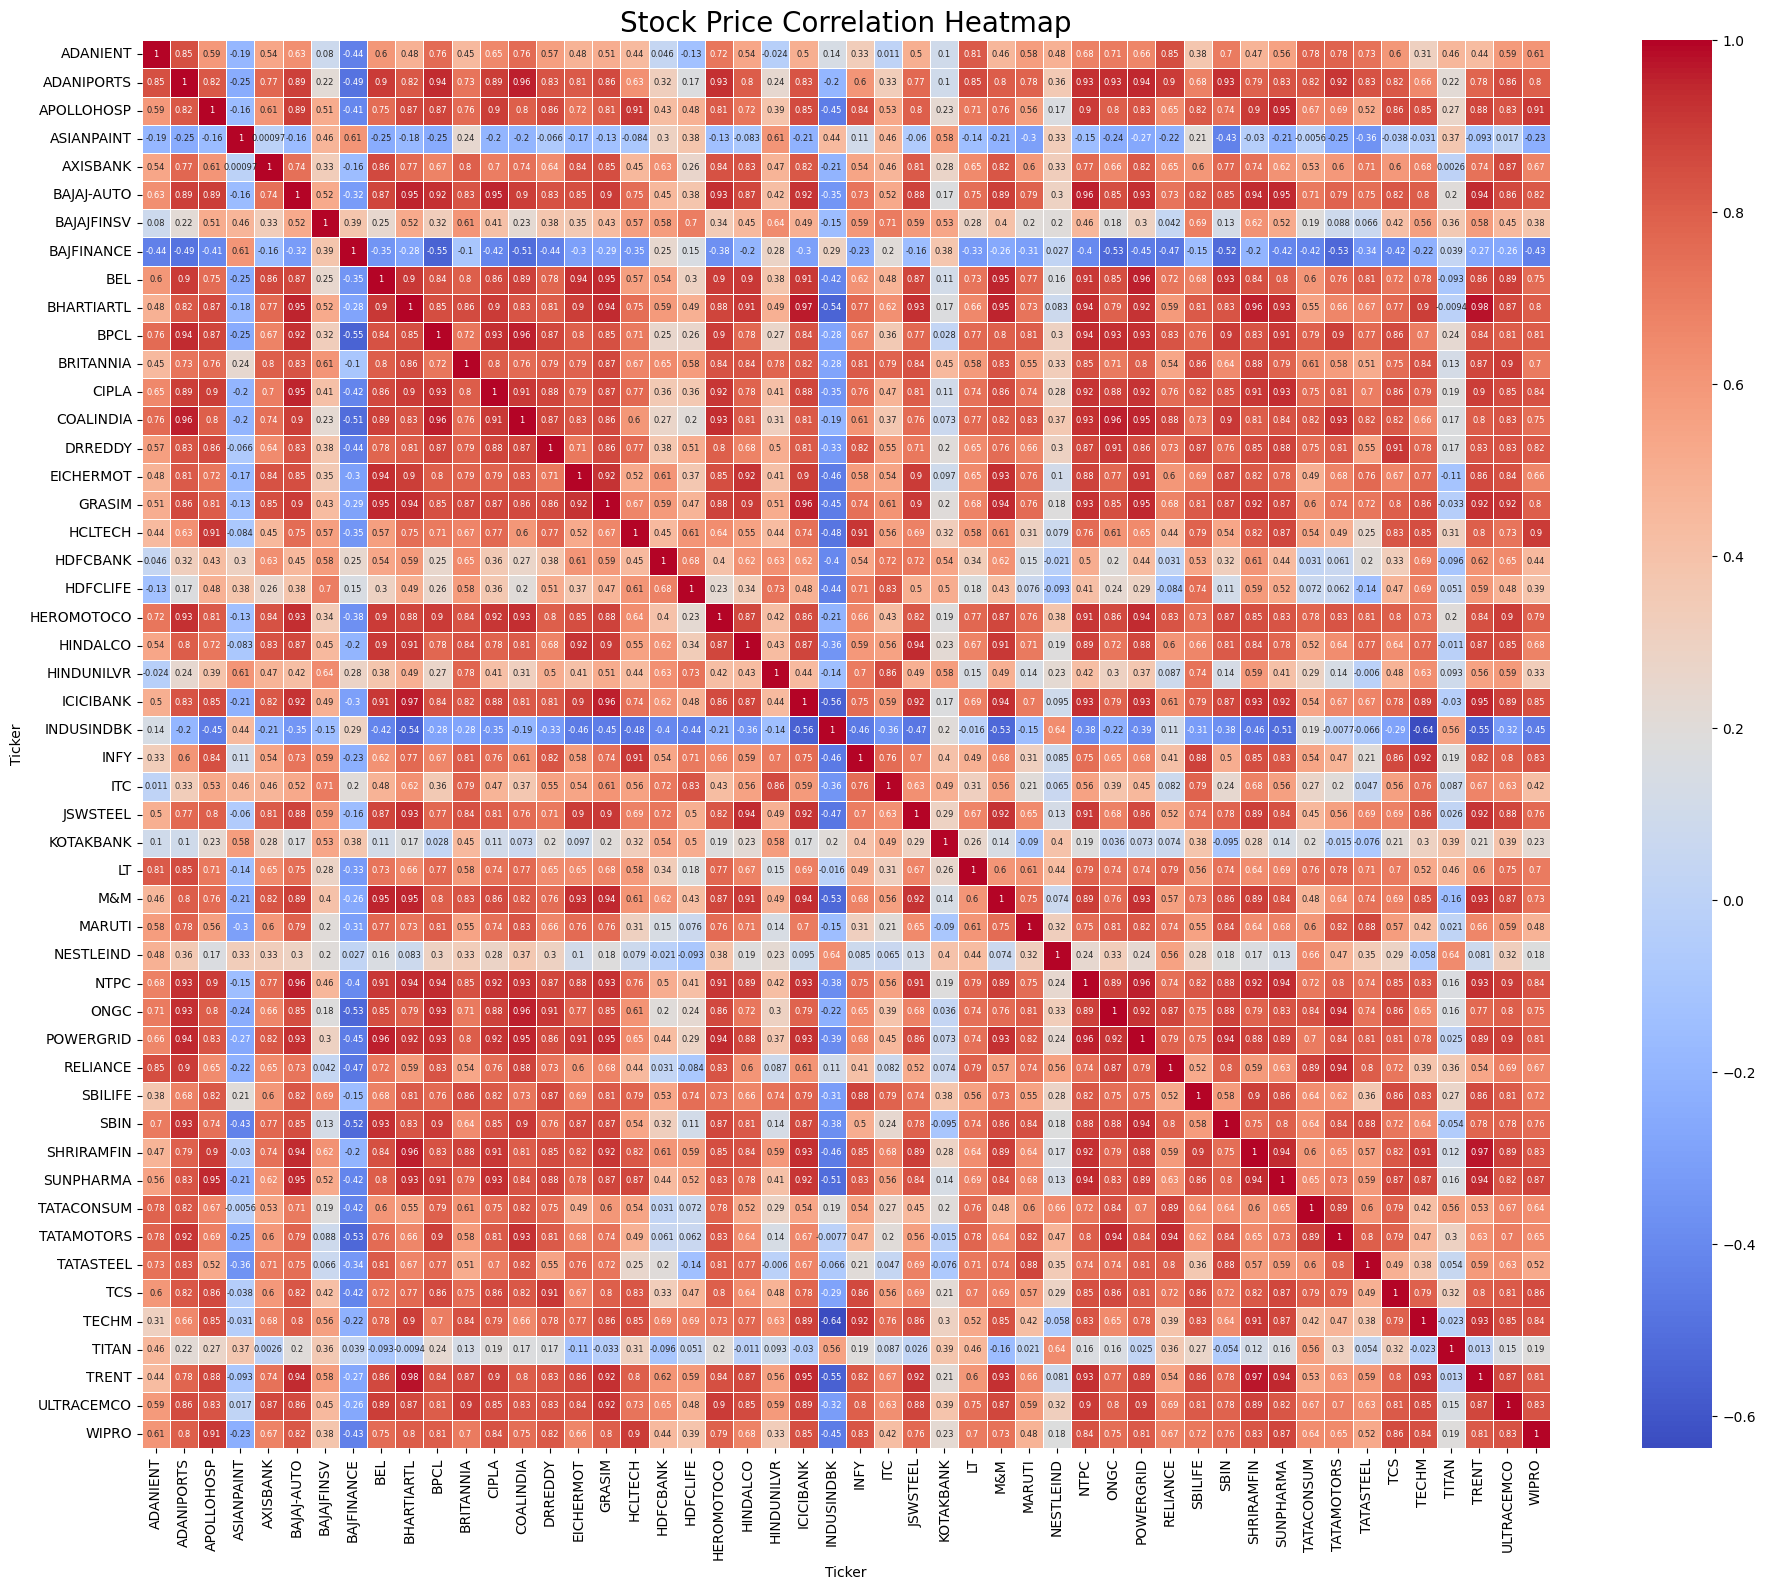

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))  # Increase figure size

sns.heatmap(corr_matrix, 
            annot=True,       # Remove numbers (optional for cleaner look)
            cmap='coolwarm',
            annot_kws={"size": 6}, 
            linewidths=0.5,
            cbar=True,         # Show colorbar
            square=True)

plt.title('Stock Price Correlation Heatmap', fontsize=20)
plt.xticks(rotation=90)  # Rotate X-axis labels
plt.yticks(rotation=0)   # Y-axis labels straight
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Load your wide correlation matrix
df = pd.read_csv(r"C:\Users\Dell\VS_code\Project2\output_csv\correlation_matrix.csv")

# Rename the first column to 'Ticker' if not already
df.rename(columns={df.columns[0]: 'Ticker'}, inplace=True)

# Melt the wide dataframe to long format
melted = df.melt(id_vars='Ticker', var_name='Ticker2', value_name='Correlation')

# Save the melted dataframe to a new CSV
melted.to_csv(r"C:\Users\Dell\VS_code\Project2\output_csv\correlation_melted.csv", index=False)